<a href="https://colab.research.google.com/github/micah-shull/superstore/blob/main/002_superstore_Profit%26Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load & Process Data

Dataset loaded successfully.


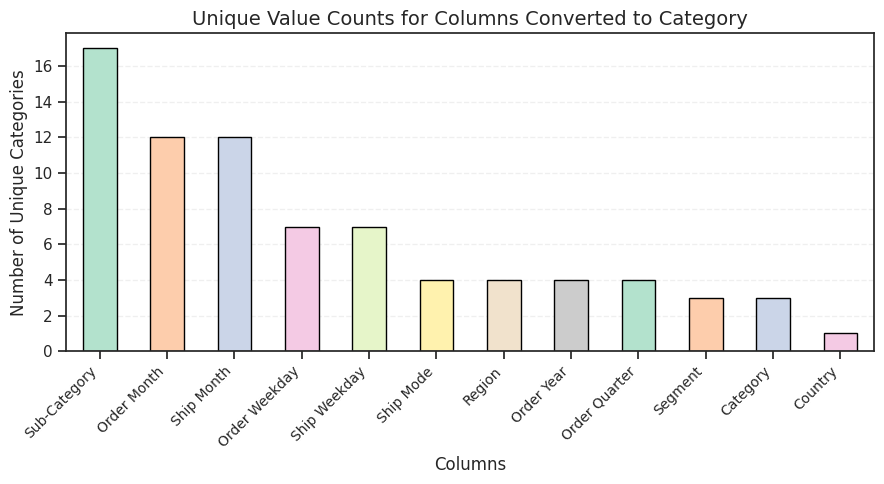

Removed 4985 duplicate rows.
Column: Sales
Lower Fence: -259.31, Upper Fence: 475.57
Original Dataset: 5009 rows
Non-Outliers: 4399 rows (87.82%)
Outliers: 610 rows (12.18%)


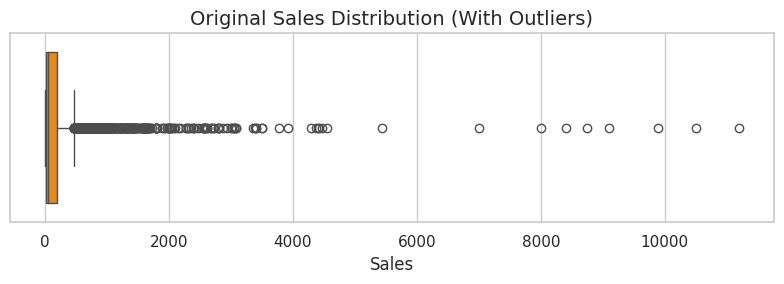

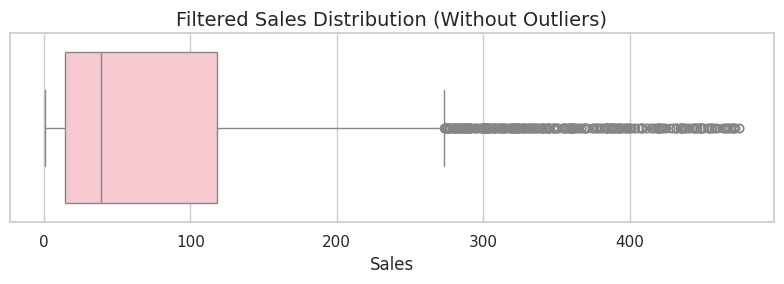

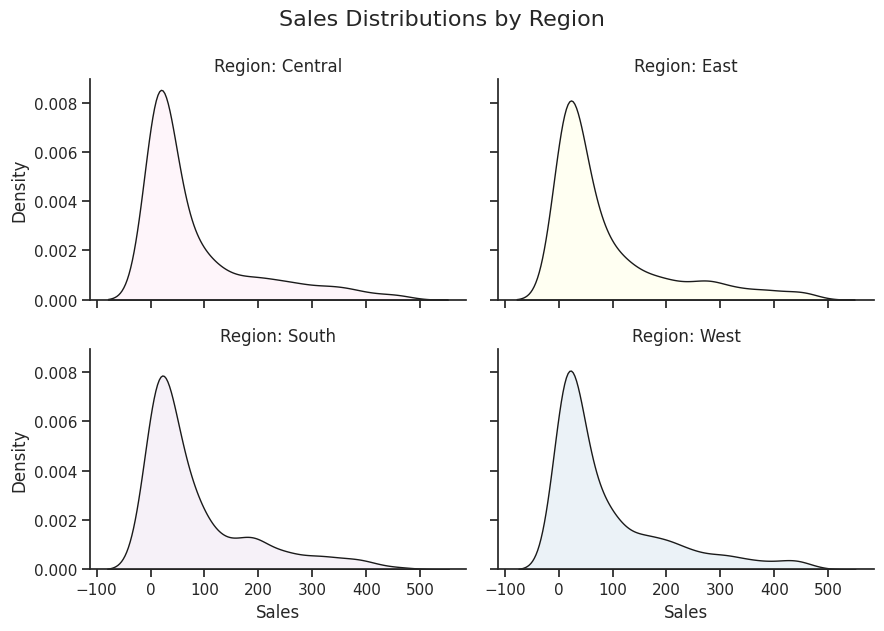

Final dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 4399 entries, 0 to 9993
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Row ID                     4399 non-null   int64         
 1   Order ID                   4399 non-null   object        
 2   Order Date                 4399 non-null   datetime64[ns]
 3   Ship Date                  4399 non-null   datetime64[ns]
 4   Ship Mode                  4399 non-null   category      
 5   Customer ID                4399 non-null   object        
 6   Customer Name              4399 non-null   object        
 7   Segment                    4399 non-null   category      
 8   Country                    4399 non-null   category      
 9   City                       4399 non-null   object        
 10  State                      4399 non-null   object        
 11  Postal Code                4399 non-null   int64 

In [ ]:
# Import the script
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_prep_utils as dpu

# Step 1: Load your dataset
try:
    data = pd.read_excel('sample-superstore.xls')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()

# Step 2: Preprocess the data (derives metrics and standardizes categorical columns)
data = dpu.preprocess_data(data)

# Step 3: Add time-based columns
data = dpu.add_time_based_columns(data)

# Step 4: Convert appropriate columns to category and visualize
exclude_columns = ['Profit per Sub-Category', 'Quantity', 'Estimated Cost', 'Average Discount',
                   'Discount', 'Total Quantity', 'Profit Margin', 'Regional Market Share (%)', 'Profit per Category', 'Order Count']
data = dpu.convert_to_category_and_visualize(data, threshold=25, exclude_columns=exclude_columns)

# Step 5: Remove duplicates
data = dpu.remove_duplicates(data, subset=['Order ID', 'Customer ID'])

# Step 6: (Optional) Standardize specific columns if needed
columns_to_standardize = ['Region', 'Category', 'Sub-Category']
data = dpu.standardize_categorical_columns(data, columns_to_standardize)

# Step 7: Remove outliers in the 'Sales' column using Tukey's Fences
filtered_data, outliers = dpu.remove_outliers_tukey(data, column='Sales', plot=True)

# Set Seaborn style and context
sns.set_theme(style="ticks", context="notebook")  # "talk" is great for presentations

# Create a grid of KDE plots for Sales by Region
g = sns.FacetGrid(filtered_data, col="Region", col_wrap=2, height=3, aspect=1.5, sharex=True, sharey=True, hue="Region", palette="Pastel1_r")
g.map(sns.kdeplot, "Sales", fill=True, edgecolor='k')

# Add titles and adjust layout
g.set_titles("Region: {col_name}")
g.set_axis_labels("Sales", "Density")
g.tight_layout()
g.fig.suptitle("Sales Distributions by Region", fontsize=16, y=1.05)
plt.show()

# Final check
print("Final dataset structure:")
print(filtered_data.info())


### Profit & Loss Plot Distributions

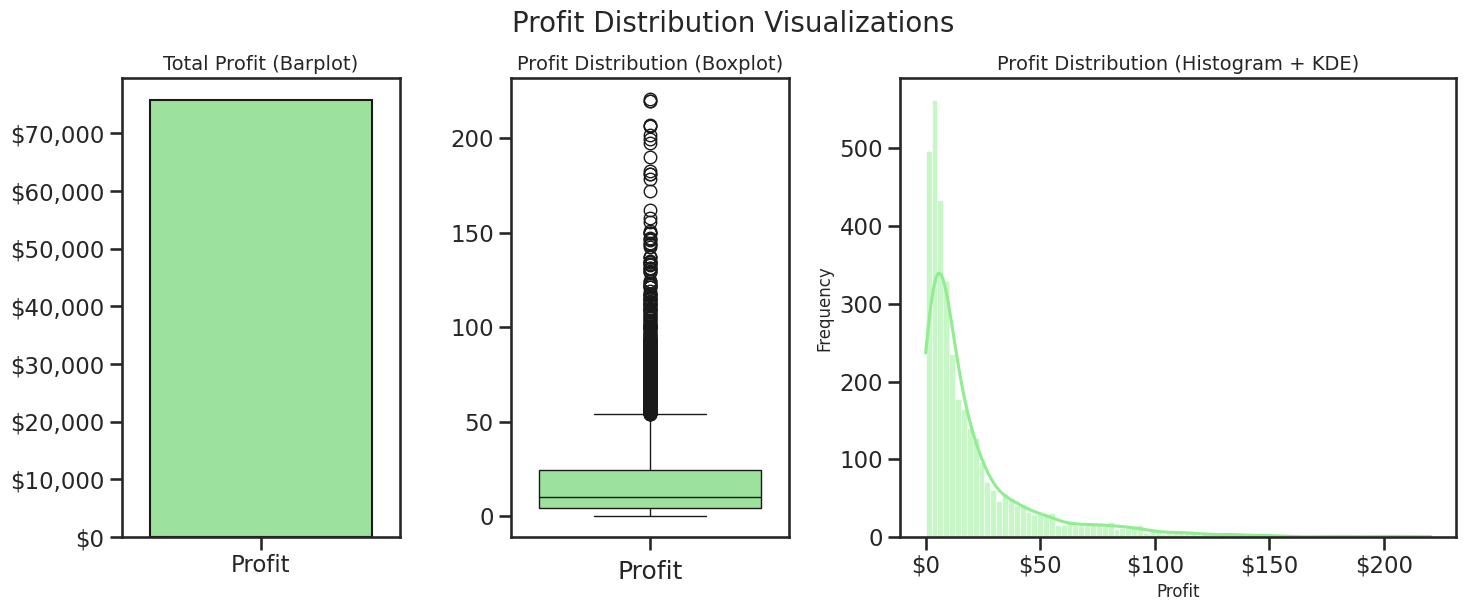

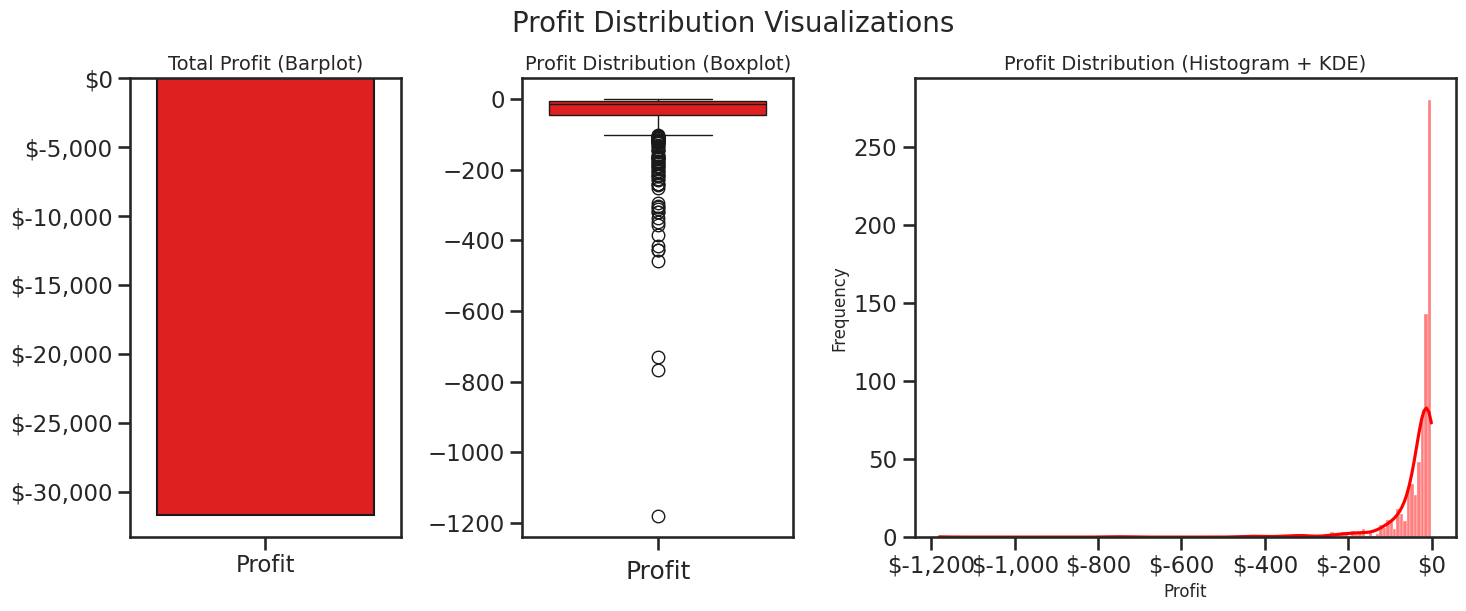

In [ ]:
# Group 1: Data with losses (Profit < 0)
data_losses = filtered_data[filtered_data['Profit'] < 0]
# Group 2: Data with profits (Profit >= 0)
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# plot the data
dvu.plot_sales_distribution(data_profits, column='Profit', title='Profit Distribution Visualizations', color='lightgreen')

# plot the data
dvu.plot_sales_distribution(data_losses , column='Profit', title='Profit Distribution Visualizations', color='red')


## Profit by Year



In [ ]:
# Step 1: Split the data into losses and profits
data_losses = filtered_data[filtered_data['Profit'] < 0]
data_profits = filtered_data[filtered_data['Profit'] >= 0]

# Step 2: Use the aggregate function to calculate metrics for each group
table_losses = dpu.calculate_aggregate_metrics(data_losses, group_by_columns=['Order Year'])
table_profits = dpu.calculate_aggregate_metrics(data_profits, group_by_columns=['Order Year'])

# Step 3: Display the results
print("\nSummary Table for Profits by Year:")
table_profits


Summary Table for Profits by Year:


,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,13437.7489,30.011673,48.669828,43471.6401,56909.3890,0.083809,5015,2501,26.658557
1,2015,16032.2799,30.069466,48.709276,47086.9201,63119.2000,0.078638,5489,2700,26.711609
2,2016,19961.2777,29.957379,48.383934,60555.8388,80517.1165,0.082070,6962,3412,26.764110
3,2017,26347.6739,30.492501,49.490443,74782.1741,101129.8480,0.080513,9069,4496,26.688082


### **Profit Analysis**

Over the years from 2014 to 2017, the company's profitability has shown steady improvement across multiple metrics:

1. **Profit Growth**:
   - Total Profit increased from **\$13,437** in 2014 to **\$26,347** in 2017, representing a **96% growth over four years**.
   - The year-over-year profit growth reflects a positive trend in revenue generation and operational efficiency.

2. **Profit Margin**:
   - The Profit Margin remained consistent around **30%** across the four years, indicating stable control over cost-to-sales ratios.
   - The slight increase to **30.49% in 2017** suggests enhanced profitability management in the most recent year.

3. **Profitability Ratio**:
   - The Profitability Ratio hovered around **48-49%**, with a peak of **49.49% in 2017**, demonstrating improved efficiency in converting costs into profits.

4. **Estimated Costs and Sales**:
   - Total Estimated Costs increased from **\$43,471** in 2014 to **\$74,782** in 2017, reflecting higher operational expenses due to expanded business activities.
   - Total Sales mirrored this growth, increasing from **\$56,909** in 2014 to **\$101,130** in 2017, showcasing successful revenue generation to offset rising costs.

5. **Order Volume**:
   - Total Order Count rose significantly, from **5,015 orders in 2014** to **9,069 orders in 2017**, highlighting increased customer demand and broader market reach.
   - Correspondingly, Total Quantity grew from **2,501 to 4,496 units**, emphasizing sustained growth in product sales volume.

6. **Regional Market Share**:
   - Market share remained stable at around **26.7%**, indicating consistent competitiveness in the market.

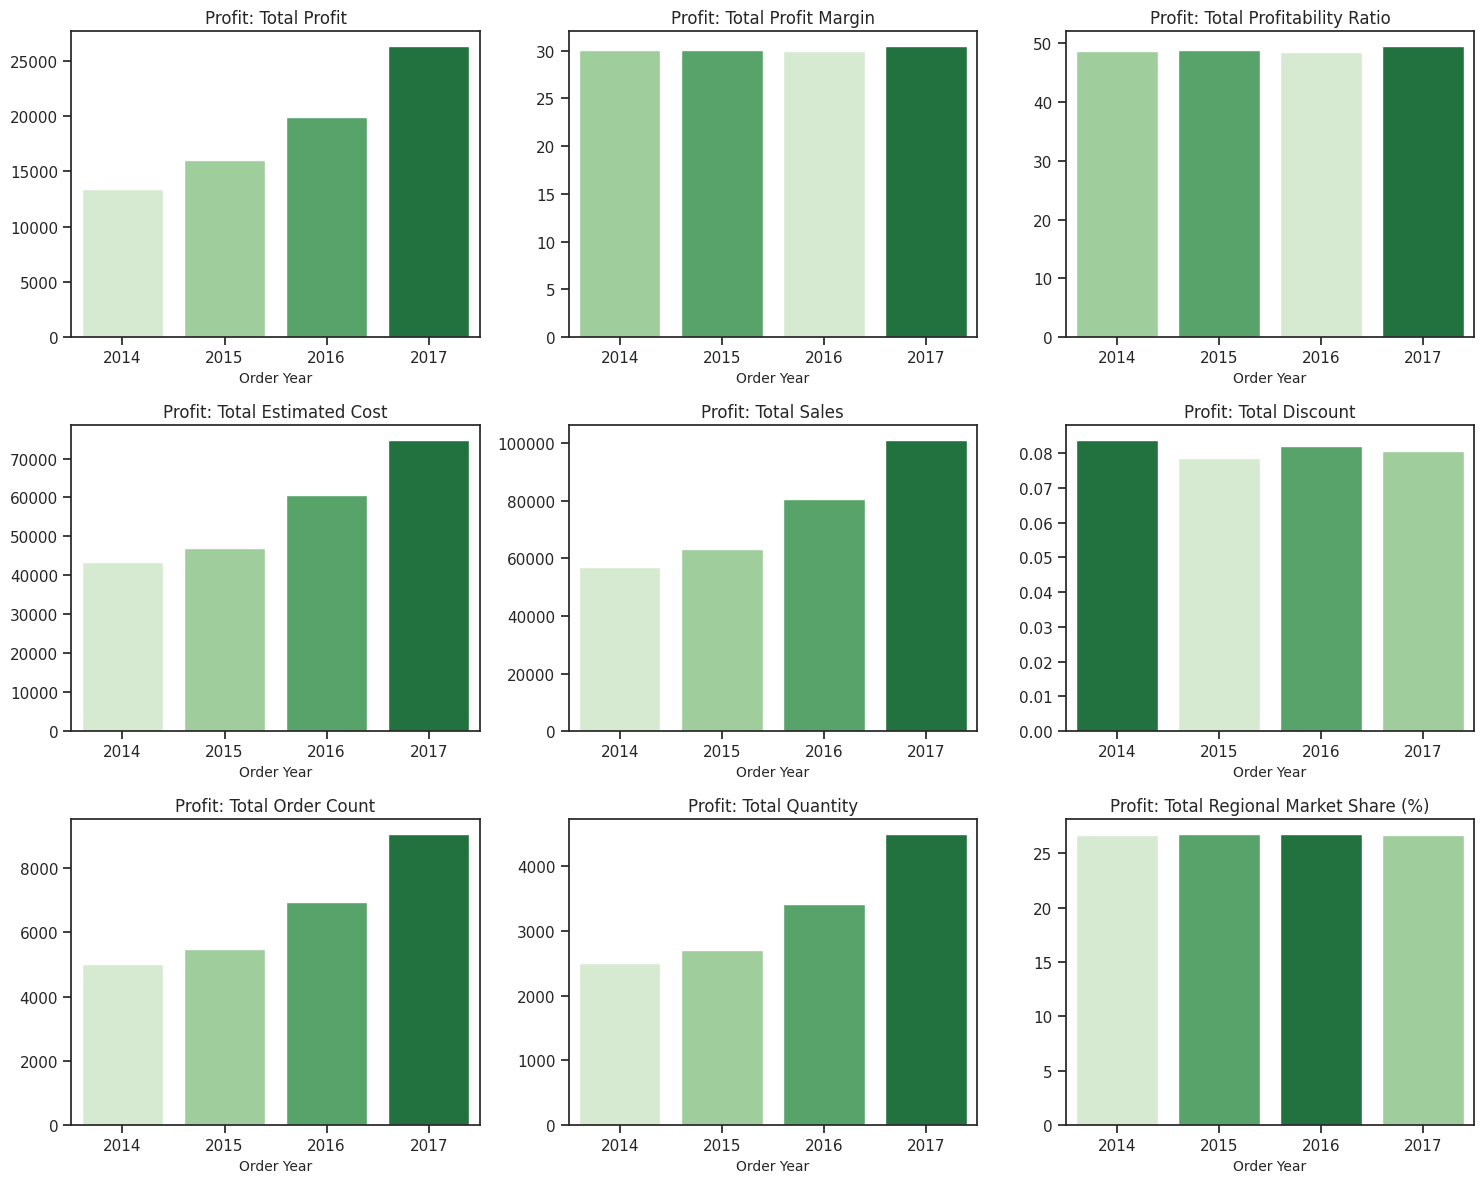

In [ ]:
import data_visualization_utils as dvu

# Define the metrics to plot
metrics = [
    'Total_Profit',
    'Total_Profit_Margin',
    'Total_Profitability_Ratio',
    'Total_Estimated_Cost',
    'Total_Sales',
    'Total_Discount',
    'Total_Order_Count',
    'Total_Quantity',
    'Total_Regional_Market_Share_(%)'
]

# Plot the grid of metrics for profit data
dvu.plot_metrics_grid(
    data=table_profits,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette="Greens"
)


## Loss by Year

In [ ]:
# Display the results
print("\nSummary Table for Loss by Year:")
table_losses


Summary Table for Loss by Year:


,Order Year,Total_Profit,Total_Profit_Margin,Total_Profitability_Ratio,Total_Estimated_Cost,Total_Sales,Total_Discount,Total_Order_Count,Total_Quantity,Total_Regional_Market_Share_(%)
0,2014,-5094.7210,-77.652874,-36.527573,16819.9770,11725.2560,0.534420,982,468,24.668116
1,2015,-6355.1013,-72.897417,-34.182110,22368.9241,16013.8228,0.523032,1150,559,24.755537
2,2016,-8898.9544,-64.173640,-32.491276,33886.3454,24987.3910,0.503796,1642,788,24.947869
3,2017,-11372.3503,-72.395193,-33.967952,40499.6347,29127.2844,0.508352,1959,970,25.030467


### **Loss Analysis**

From 2014 to 2017, the company's losses have steadily increased, posing significant challenges that demand attention:

1. **Rising Losses**:
   - Total Losses grew from **$5,095** in 2014 to **$11,372** in 2017, representing a **123% increase over four years**.
   - The consistent rise in losses indicates potential inefficiencies in certain segments or product lines.

2. **Profit Margin**:
   - The negative Profit Margin remained substantial but fluctuated, with the lowest margin at **-64.17% in 2016** and the highest at **-77.65% in 2014**.
   - While there was slight improvement in 2016, the margin worsened again to **-72.40% in 2017**, highlighting persistent cost-to-sales issues.

3. **Profitability Ratio**:
   - The Profitability Ratio improved slightly over the years, moving from **-36.53% in 2014** to **-33.97% in 2017**.
   - While this indicates some progress in minimizing inefficiencies, the ratio remains a critical area to address.

4. **Estimated Costs and Sales**:
   - Total Estimated Costs rose sharply, from **$16,820** in 2014 to **$40,500** in 2017, reflecting significant cost burdens.
   - Total Sales also increased, from **$11,725** in 2014 to **$29,127** in 2017, but this growth in revenue has not been enough to offset the rising losses.

5. **Order Volume**:
   - Total Order Count nearly doubled, from **982 orders in 2014** to **1,959 orders in 2017**, suggesting increased customer activity.
   - Total Quantity also grew, from **468 units in 2014** to **970 units in 2017**, emphasizing expanded operations.

6. **Regional Market Share**:
   - Market share for loss-incurring activities has remained relatively stable, around **24.7-25%**, highlighting consistent exposure to unprofitable segments.

---

### Key Insights and Recommendations:
- **Address Cost Inefficiencies**: Rising Estimated Costs are a major contributor to increased losses. Conduct a detailed cost analysis to identify and mitigate high-cost drivers.
- **Analyze Loss-Generating Segments**: Losses are growing disproportionately compared to sales. Focus on underperforming categories or products contributing to these losses.
- **Optimize Pricing and Discounts**: The average discount remained above **50%** across the years, potentially undermining profitability. Review discount policies to balance competitiveness with sustainable margins.
- **Leverage Data for Decision-Making**: The growth in order volume and sales indicates potential for recovery. Use these insights to realign resources toward more profitable operations.

The trend of rising losses requires immediate intervention, focusing on cost management, strategic pricing, and realigning product offerings to minimize unprofitable operations.



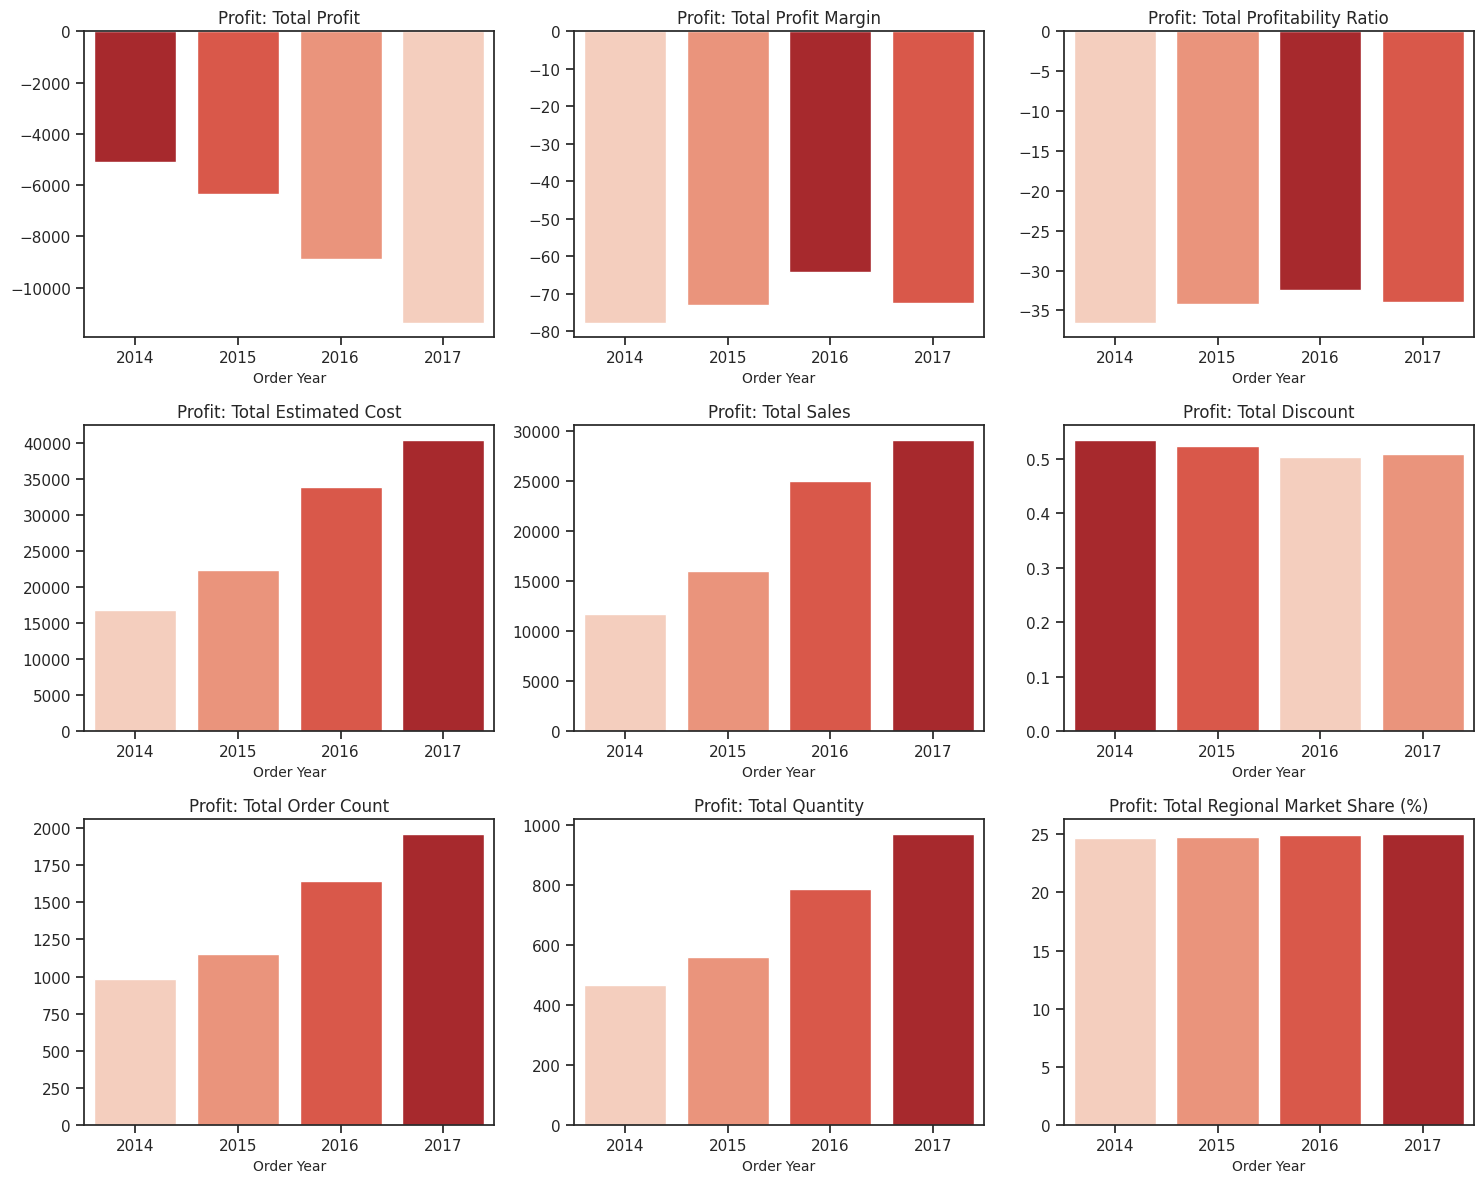

In [ ]:
# Plot the grid of metrics for losses data
dvu.plot_metrics_grid(
    data=table_losses,
    metrics=metrics,
    group_by_column='Order Year',
    title_prefix="Profit: ",
    palette="Reds"
)

#### Data Utils Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(data):
    """
    Prepares and preprocesses the Superstore dataset by cleaning, deriving core metrics,
    and converting appropriate columns to categorical types.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Derived Metrics
    # 1. Profit Margin
    data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

    # 2. Estimated Cost
    data['Estimated Cost'] = data['Sales'] - data['Profit']

    # 3. Profitability Ratio
    # Avoid division by zero errors by checking non-zero estimated cost
    data['Profitability Ratio'] = data.apply(
        lambda row: (row['Profit'] / row['Estimated Cost']) * 100 if row['Estimated Cost'] != 0 else 0,
        axis=1
    )

    # 4. Customer Metrics: Total Sales, Profit, and Order Count
    customer_metrics = data.groupby('Customer ID').agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Order ID': 'nunique'  # Number of orders
    }).rename(columns={'Order ID': 'Order Count'})

    # 5. Regional Market Share
    region_sales = data.groupby('Region')['Sales'].sum()
    total_sales = data['Sales'].sum()
    regional_market_share = (region_sales / total_sales) * 100

    # Merge customer metrics back to the main dataset
    data = data.merge(customer_metrics, on='Customer ID', suffixes=('', '_Customer'))
    data['Regional Market Share (%)'] = data['Region'].map(region_sales / total_sales * 100)

    # Convert relevant columns to categorical
    categorical_columns = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
    for column in categorical_columns:
        data[column] = data[column].astype('category')

    return data


def convert_to_category_and_visualize(data, threshold=25, exclude_columns=None):
    """
    Converts columns with fewer than 'threshold' unique values to 'category' dtype,
    excluding specified columns, and visualizes the unique value counts.
    """
    if exclude_columns is None:
        exclude_columns = []

    # Count unique values for each column
    unique_counts = data.nunique()

    # Identify columns to convert, excluding specified columns
    columns_to_convert = [
        col for col in unique_counts[unique_counts < threshold].index
        if col not in exclude_columns
    ]

    # Convert selected columns to 'category' dtype
    for column in columns_to_convert:
        data[column] = data[column].astype('category')

    # Filter for columns with fewer than threshold unique values for visualization
    filtered_counts = unique_counts[
        (unique_counts < threshold) & (~unique_counts.index.isin(exclude_columns))
    ]

    # Visualize unique value counts
    palette = sns.color_palette("Pastel2", len(filtered_counts))
    plt.figure(figsize=(9, 5))
    filtered_counts.sort_values(ascending=False).plot(
        kind='bar',
        color=palette,
        edgecolor='black'
    )
    plt.title('Unique Value Counts for Columns Converted to Category', fontsize=14)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Unique Categories', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Verify the conversions
    # print("\nColumns converted to 'category' dtype:")
    # for column in columns_to_convert:
    #     print(f"{column}: {data[column].dtype}")

    return data

def add_time_based_columns(data):
    """
    Adds time-based columns derived from Order Date and Ship Date to the dataset,
    and converts these columns to categorical type for analysis and visualization.
    """
    # Ensure the order and ship date columns are in datetime format
    data['Order Date'] = pd.to_datetime(data['Order Date'])
    data['Ship Date'] = pd.to_datetime(data['Ship Date'])

    # Create new time-based columns
    data['Order Year'] = data['Order Date'].dt.year
    data['Order Quarter'] = data['Order Date'].dt.quarter
    data['Order Month'] = data['Order Date'].dt.month
    data['Order Day'] = data['Order Date'].dt.day
    data['Order Weekday'] = data['Order Date'].dt.day_name()  # e.g., 'Monday', 'Tuesday'

    data['Ship Month'] = data['Ship Date'].dt.month
    data['Ship Day'] = data['Ship Date'].dt.day
    data['Ship Weekday'] = data['Ship Date'].dt.day_name()

    # Convert the new columns to categorical
    time_columns = ['Order Year', 'Order Month', 'Order Month', 'Order Day', 'Order Weekday', 'Ship Month', 'Ship Day', 'Ship Weekday']
    for column in time_columns:
        data[column] = data[column].astype('category')

    return data

def standardize_categorical_columns(data, columns=None):
    """
    Standardizes categorical columns by converting their values to title case.
    If `columns` is None, all categorical columns are standardized.
    """
    if columns is None:
        columns = data.select_dtypes(include='category').columns

    for column in columns:
        if column in data.columns:
            data[column] = data[column].astype(str).str.title().astype('category')
    return data


def remove_duplicates(data, subset=None):
    """
    Removes duplicate rows from the dataset and reports the number of rows removed.

    Parameters:
    - data: DataFrame
        The dataset to remove duplicates from.
    - subset: list or None, optional
        Columns to consider for identifying duplicates. If None, all columns are used.

    Returns:
    - DataFrame: A new DataFrame with duplicates removed.
    """
    initial_shape = data.shape
    # Drop duplicates using the provided subset or across all columns if subset is None
    data = data.loc[~data.duplicated(subset=subset)].copy()
    removed_rows = initial_shape[0] - data.shape[0]
    print(f"Removed {removed_rows} duplicate rows.")
    return data


def calculate_aggregate_metrics(data, group_by_columns):
    """
    Dynamically calculates aggregate metrics for specified groupings.

    Parameters:
    - data: DataFrame
        The dataset to calculate metrics from.
    - group_by_columns: list
        The columns to group the data by.

    Returns:
    - DataFrame: A new DataFrame with the aggregated metrics.
    """
    # Define the aggregation columns and their operations
    aggregation_columns = {
        'Profit': 'sum',
        'Profit Margin': 'mean',
        'Profitability Ratio': 'mean',  # New metric
        'Estimated Cost': 'sum',
        'Sales': 'sum',
        'Discount': 'mean',
        'Order Count': 'sum',
        'Quantity': 'sum',
        'Regional Market Share (%)': 'mean'  # New metric
    }

    # Perform the group-by operation and apply aggregations
    aggregated_data = data.groupby(group_by_columns, observed=True).agg(**{
        f"Total_{key.replace(' ', '_')}": (key, agg_func)
        for key, agg_func in aggregation_columns.items()
    })

    # Reset index for better readability
    aggregated_data = aggregated_data.reset_index()

    return aggregated_data

def detect_outliers_tukey(data, column):
    """
    Detects outliers using Tukey's Fences method for a specified column.

    Parameters:
    - data: DataFrame
        The dataset to analyze.
    - column: str
        The column for which to detect outliers.

    Returns:
    - non_outliers: DataFrame
        Subset of data without outliers.
    - outliers: DataFrame
        Subset of data containing outliers.
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    non_outliers = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)]
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)]

    return non_outliers, outliers

def remove_outliers_tukey(data, column, plot=True):
    """
    Removes outliers from a specified column in the dataset using Tukey's Fences (IQR Method),
    and optionally plots the data before and after outlier removal.

    Parameters:
    - data (DataFrame): The input dataset.
    - column (str): The column on which to perform outlier detection.
    - plot (bool): Whether to plot boxplots for the original and filtered data.

    Returns:
    - filtered_data (DataFrame): Dataset without outliers.
    - outliers (DataFrame): Outlier data points.

    Example:
        filtered_data, outliers = remove_outliers_tukey(data, column='Sales', plot=True)

    Notes:
        - This function uses Tukey's Fences (IQR method) to detect and remove outliers.
        - Suitable for continuous numeric data with potential outliers.
    """
    # Compute Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Filter data
    filtered_data = data[(data[column] >= lower_fence) & (data[column] <= upper_fence)].copy()
    outliers = data[(data[column] < lower_fence) | (data[column] > upper_fence)].copy()

    # Print summary
    print(f"Column: {column}")
    print(f"Lower Fence: {lower_fence:.2f}, Upper Fence: {upper_fence:.2f}")
    print(f"Original Dataset: {len(data)} rows")
    print(f"Non-Outliers: {len(filtered_data)} rows ({len(filtered_data) / len(data) * 100:.2f}%)")
    print(f"Outliers: {len(outliers)} rows ({len(outliers) / len(data) * 100:.2f}%)")

    # Plotting
    if plot:
        sns.set_theme(style="whitegrid", context="notebook")

        # Plot original data
        if len(data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=data[column], color='darkorange')
            plt.title(f"Original {column} Distribution (With Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

        # Plot filtered data
        if len(filtered_data) > 0:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=filtered_data[column], color='pink')
            plt.title(f"Filtered {column} Distribution (Without Outliers)", fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.tight_layout()
            plt.show()

    return filtered_data, outliers


'''

with open("data_prep_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_prep_utils.py")

# Import and reload the module to use its functions
import importlib
import data_prep_utils as dpu
importlib.reload(dpu)



Script successfully written to data_prep_utils.py


<module 'data_prep_utils' from '/content/data_prep_utils.py'>

#### Data Visualization Script

In [ ]:
script_content=r'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_sales_distribution(data, column='Sales', title='Sales Distribution Visualizations', color='lightgreen'):
    """
    Visualizes the distribution of a specified column with a barplot, boxplot, and histogram (with KDE).

    Args:
        data (pd.DataFrame): The dataset containing the sales data.
        column (str): The column to visualize. Default is 'Sales'.
        title (str): The title for the overall plot.
        color (str): The color for the visualizations. Default is 'lightgreen'.

    Returns:
        None: Displays the plots directly.
    """
    # Set Seaborn theme
    sns.set_theme(style="ticks", context="talk")

    # Create the figure and subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={'width_ratios': [1, 1, 2]})

    # Barplot: Total sales
    total_value = data[column].sum()
    sns.barplot(x=[column], y=[total_value], color=color, edgecolor='k', ax=axes[0])
    axes[0].set_title(f"Total {column} (Barplot)", fontsize=14)
    axes[0].set_xlabel("")
    axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Boxplot: Distribution of sales
    sns.boxplot(y=data[column], color=color, showfliers=True, ax=axes[1], linecolor='k')
    axes[1].set_title(f"{column} Distribution (Boxplot)", fontsize=14)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("")

    # Histogram with KDE: Overall sales distribution
    sns.histplot(data=data, x=column, kde=True, color=color, ax=axes[2])
    axes[2].set_title(f"{column} Distribution (Histogram + KDE)", fontsize=14)
    axes[2].set_xlabel(column, fontsize=12)
    axes[2].set_ylabel("Frequency", fontsize=12)
    axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))
    axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Adjust layout
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()


def calculate_stats(data, column, **kwargs):
    """
    Calculate descriptive statistics for a given column and return selected metrics.

    Args:
        data (pd.DataFrame): The dataset.
        column (str): Column name for which to calculate statistics.
        kwargs: Keyword arguments specifying which statistics to calculate.

    Returns:
        dict: Dictionary of selected descriptive statistics.
    """
    stats = {}

    # Calculate all available statistics
    all_stats = {
        "min": data[column].min(),
        "median": data[column].median(),
        "mean": data[column].mean(),
        "mode": data[column].mode().iloc[0],  # First mode
        "std": data[column].std(),
        "max": data[column].max(),
        "range": data[column].max() - data[column].min()
    }

    # Filter based on kwargs or include all if no kwargs specified
    if not kwargs:
        stats = all_stats  # Return all stats if no specific arguments provided
    else:
        stats = {stat: all_stats[stat] for stat, include in kwargs.items() if include}

    return stats

def plot_descriptive_stats(stats, column_name, color_palette="Pastel2"):
    """
    Visualizes descriptive statistics as a horizontal barplot, with the column name in the title.

    Args:
        stats (dict): Dictionary of descriptive statistics where keys are statistic names and values are their numeric values.
        column_name (str): Name of the column the statistics represent (e.g., 'Sales', 'Profit').
        color_palette (str): Seaborn color palette for the bars. Default is "Pastel2".

    Returns:
        None: Displays the plot directly.
    """
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Convert stats dictionary to DataFrame
    stats_df = pd.DataFrame(stats.items(), columns=["Statistic", "Value"])

    # Create the horizontal barplot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=stats_df,
        y="Statistic",  # Use y-axis for categories
        x="Value",  # Use x-axis for values
        hue="Statistic", palette=color_palette,
        edgecolor="black"
    )

    # Add value annotations to each bar
    for index, row in stats_df.iterrows():
        ax.text(
            row["Value"] + 5,  # Slightly offset to the right of the bar
            index,  # Position at the center of the bar
            f"${row['Value']:,.2f}",  # Format with full value
            va="center",  # Center vertically
            ha="left",  # Align text to the left of the bar
            fontsize=12
        )

    # Add labels and title
    plt.title(f"Descriptive Statistics for {column_name}", fontsize=16)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("")
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

def plot_metrics_grid(data, metrics, group_by_column, title_prefix="", palette="Greens_d", figsize=(15, 12)):
    """
    Plots a grid of barplots for multiple metrics grouped by a specified column, using a subset of darker colors.

    Parameters:
    - data (DataFrame): The dataset containing the metrics.
    - metrics (list): A list of column names (metrics) to plot.
    - group_by_column (str): The column to group by on the x-axis (e.g., 'Order Year').
    - title_prefix (str): A prefix for the plot titles (e.g., 'Total ').
    - palette (str): The Seaborn color palette to use for the plots.
    - figsize (tuple): The size of the entire figure (width, height).

    Returns:
    - None: Displays the plot.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Use a subset of darker colors from the palette
    colors = sns.color_palette(palette, 4)  # Select 4 darker shades

    # Set up the grid
    n_cols = 3
    n_rows = -(-len(metrics) // n_cols)  # Ceiling division to determine rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Plot each metric
    for i, metric in enumerate(metrics):
        if i < len(metrics):
            sns.barplot(
                data=data,
                x=group_by_column,
                y=metric,
                hue=metric, palette=colors, legend=False,
                ax=axes[i]
            )
            axes[i].set_title(f"{title_prefix}{metric.replace('_', ' ')}", fontsize=12)
            axes[i].set_xlabel(group_by_column.replace('_', ' '), fontsize=10)
            axes[i].set_ylabel('', fontsize=10)
        else:
            axes[i].axis('off')  # Turn off empty subplots

    # Adjust layout
    plt.tight_layout()
    plt.show()


'''

with open("data_visualization_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to data_visualization_utils.py")

# Import and reload the module to use its functions
import importlib
import data_visualization_utils as dvu
importlib.reload(dvu)

Script successfully written to data_visualization_utils.py


<module 'data_visualization_utils' from '/content/data_visualization_utils.py'>